## Data 602 - Final Project

Shoshana Farber

**Abtract:**

The movie industry is ever changing and 

**Introduction:**

The dataset selected for this project encompasses IMDb movies and their associated attributes, including release year, rating, genre, certification, and key production details such as director, stars, runtime, and more. IMDb is an internet movie database featuring information on thousands of movies, TV shows, video games, and more worldwide. From timeless classics to the latest releases, IMDb spans the entire spectrum of entertainment. Registered users can rate movies, helping others discover popular and noteworthy films.

This project aims to identify features influencing film popularity on IMDb. Utilizing Python, we will analyze genres, directors, actors, and more to uncover the factors contributing to a movie's success.

**Data Sources:**

Data was sourced from Kaggle and can be found [here](https://www.kaggle.com/datasets/dk123891/10000-movies-data?select=data.csv).

**EDA and Summary Statistics:**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# import data
movies_df = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_602/assignment7/sup-imdb-movies.csv', index_col=0)

# preview data
movies_df.head()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [143]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie Name           10000 non-null  object 
 1   Year of Release      10000 non-null  int64  
 2   Run Time in minutes  10000 non-null  int64  
 3   Movie Rating         10000 non-null  float64
 4   Votes                10000 non-null  int64  
 5   MetaScore            7974 non-null   float64
 6   Gross                7085 non-null   float64
 7   Genre                10000 non-null  object 
 8   Certification        9631 non-null   object 
 9   Director             10000 non-null  object 
 10  Stars                10000 non-null  object 
 11  Description          10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1015.6+ KB


There are 10,000 rows and 12 columns in the dataset. 

From the datatypes of each of the columns and the descriptions of each, it seems all columns are cast correctly.

In [144]:
movies_df.isnull().sum()

Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

Most of the columns are not missing any values. `MetaScore`, `Gross`, and `Certification` have missing values. `Gross` is missing almost 3,000 values. 

Let's take a look at the summary statistics for some of the numeric variables.

In [145]:
movies_df[['Run Time in minutes', 'Movie Rating', 'Votes', 'MetaScore', 'Gross']].describe().T

,count,mean,std,min,25%,50%,75%,max
Run Time in minutes,10000.0,1.107250e+02,2.205307e+01,45.0,96.00,107.0,121.0,439.0
Movie Rating,10000.0,6.727020e+00,8.212645e-01,4.9,6.10,6.7,7.3,9.3
Votes,10000.0,9.279738e+04,1.716509e+05,10002.0,16851.75,34179.5,91546.0,2804443.0
MetaScore,7974.0,5.917143e+01,1.726880e+01,7.0,47.00,60.0,72.0,100.0
Gross,7085.0,4.017500e+07,6.748658e+07,0.0,2340000.00,16930000.0,48640000.0,936660000.0


The average rating for the entire dataset is about 6.7 and the average MetaScore is about 59. 

The average gross is about $43M. The average number of votes for a movie is about 126,000. 

The average runtime is about 110 minutes. 

Let's take a look at descriptive statistics for the character columns:

In [146]:
movies_df[['Movie Name', 'Genre', 'Certification', 'Director', 'Stars']].describe().T

,count,unique,top,freq
Movie Name,10000,9632,The Mummy,4
Genre,10000,425,"['Comedy', ' Drama', ' Romance']",481
Certification,9631,24,R,4048
Director,10000,4162,['Woody Allen'],47
Stars,10000,9947,"['William Shatner', 'Leonard Nimoy', 'DeForest...",6


Not all movie names are unique. _The Mummy_ appears four times. This is probably due to remakes in later years or sequels to movies with the same title. Before doing the analysis, we will be sure to remove any duplicates. We will also add the year of production to the movie title to ensure that each movie is unique. 

The top certification among these movies is R.

Woody Allen directed 47 movies in the dataset.

`Stars` is not either all unique. There are 6 instances of the top stars from a movie all appearing in another movie within the dataset. This can be due to a cast being in multiple movies (for example sequels to movies) and we will make sure to drop any possible duplicate rows. 

Let's check for any possible duplicate rows:

In [147]:
# drop any possible duplicate rows
len(movies_df) == len(movies_df.drop_duplicates())

True

There are no duplicate rows (i.e. no film appearing more than once in the dataset).

**How many certifications (content ratings) are there in the dataset?**

In [148]:
print(f"There are {len(movies_df['Certification'].unique())} certifications in the dataset")

There are 25 certifications in the dataset


**Which certifications appear the most?**

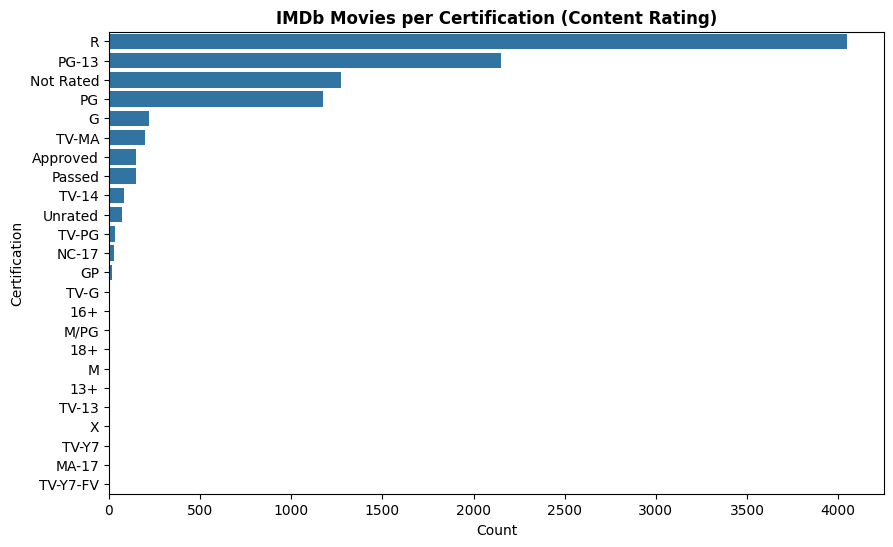

In [149]:
# get counts of movie ratings (certification)
cert_count = movies_df['Certification'].value_counts().reset_index()

# graph
fig = plt.figure(figsize=(10,6))

sns.barplot(x = 'count', y = 'Certification', data=cert_count)
plt.xlabel('Count')
plt.title('IMDb Movies per Certification (Content Rating)', fontweight='bold')

plt.show()

R-rated and PG-13 movies make up more than half the movies in the dataset.

**How many combinations of genres are there?**

In [150]:
print(f"There are {len(movies_df['Genre'].unique())} combinations of genres in the dataset")

There are 425 combinations of genres in the dataset


What is the distribution of ratings? MetaScore? Gross revenue?

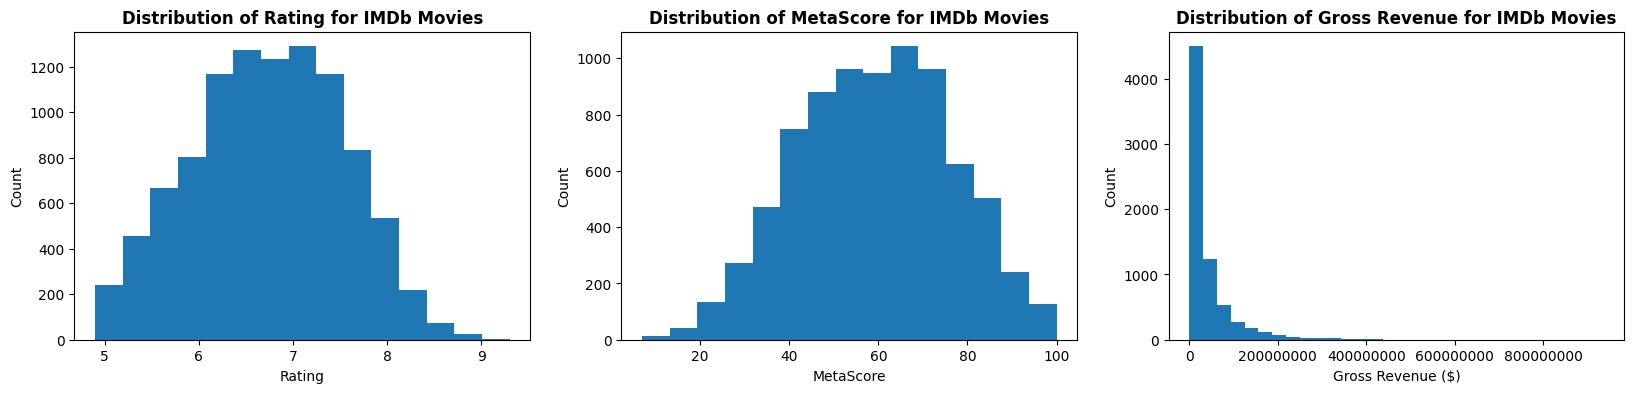

In [151]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,4))

ax[0].hist(x = movies_df['Movie Rating'], bins=15)
ax[0].ticklabel_format(style='plain', axis='both')
ax[0].set_title('Distribution of Rating for IMDb Movies', fontweight='bold')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')

ax[1].hist(x = movies_df['MetaScore'], bins=15)
ax[1].ticklabel_format(style='plain', axis='both')
ax[1].set_title('Distribution of MetaScore for IMDb Movies', fontweight='bold')
ax[1].set_xlabel('MetaScore')
ax[1].set_ylabel('Count')

ax[2].hist(x = movies_df['Gross'], bins=30)
ax[2].ticklabel_format(style='plain', axis='both')
ax[2].set_title('Distribution of Gross Revenue for IMDb Movies', fontweight='bold')
ax[2].set_xlabel('Gross Revenue ($)')
ax[2].set_ylabel('Count')

plt.show()

Ratings and MetaScores seem to be relatively normally distributed. Gross revenue has a severe right skew. 

What are the top movies in the dataset?

Let's find the top 10 movies by various methods - highest rated, highest metascore, highest gross, highest voted.

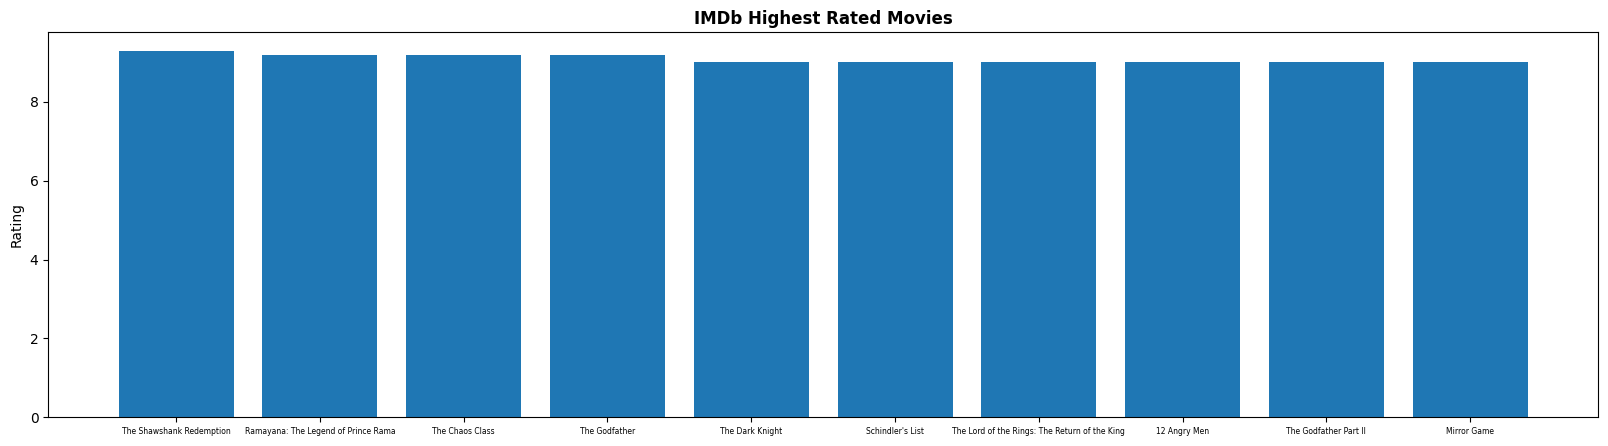

In [152]:
# top rated
top_rated = movies_df.sort_values('Movie Rating', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_rated['Movie Name'][:10], height=top_rated['Movie Rating'][:10])
plt.xticks(size=5.5)
plt.title('IMDb Highest Rated Movies', fontweight='bold')
plt.ylabel('Rating')

plt.show()

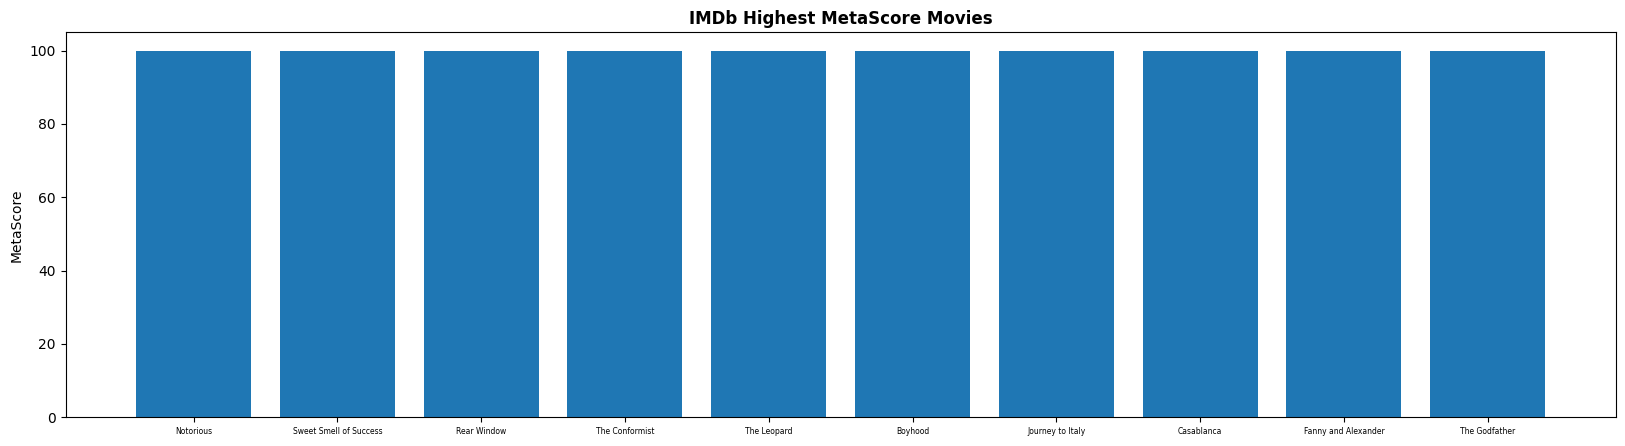

In [153]:
# top metascore
top_meta = movies_df.sort_values('MetaScore', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_meta['Movie Name'][:10], height=top_meta['MetaScore'][:10])
plt.xticks(size=5.5)
plt.title('IMDb Highest MetaScore Movies', fontweight='bold')
plt.ylabel('MetaScore')

plt.show()

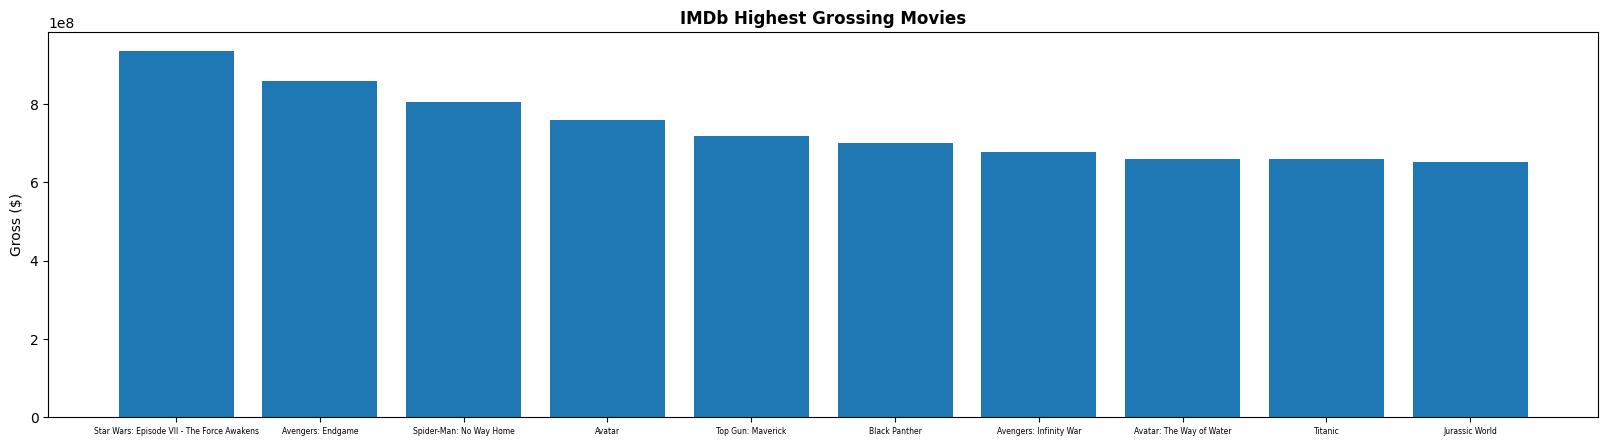

In [154]:
# highest gross
top_gross = movies_df.sort_values('Gross', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_gross['Movie Name'][:10], height=top_gross['Gross'][:10])
plt.xticks(size=5.5)
plt.title('IMDb Highest Grossing Movies', fontweight='bold')
plt.ylabel('Gross ($)')

plt.show()

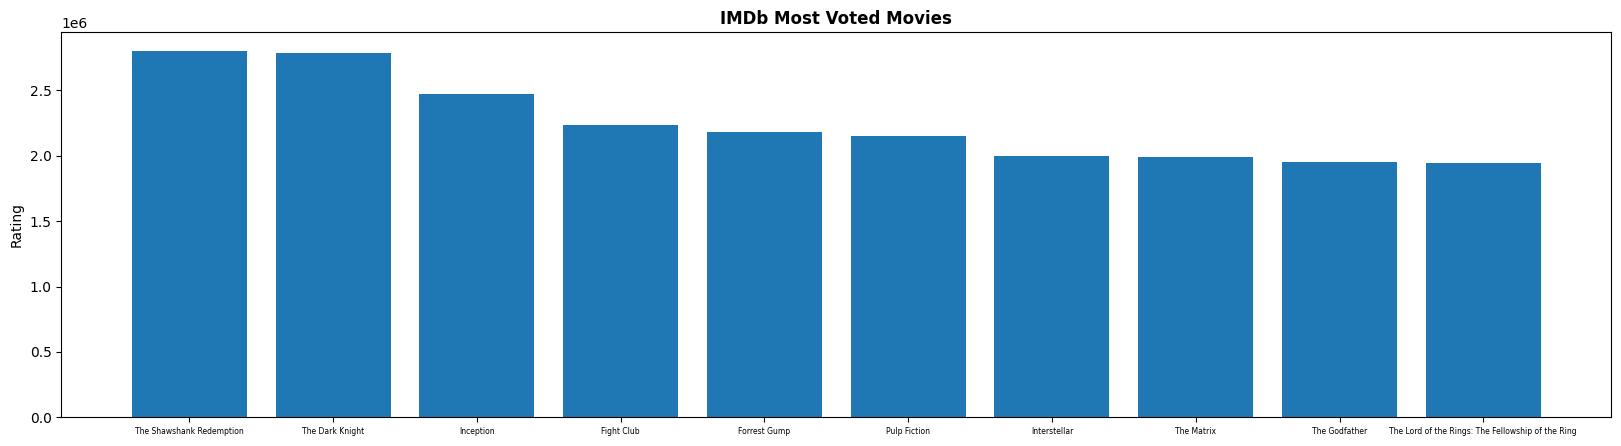

In [155]:
# top voted
top_voted = movies_df.sort_values('Votes', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_voted['Movie Name'][:10], height=top_voted['Votes'][:10])
plt.xticks(size=5.5)
plt.title('IMDb Most Voted Movies', fontweight='bold')
plt.ylabel('Rating')

plt.show()

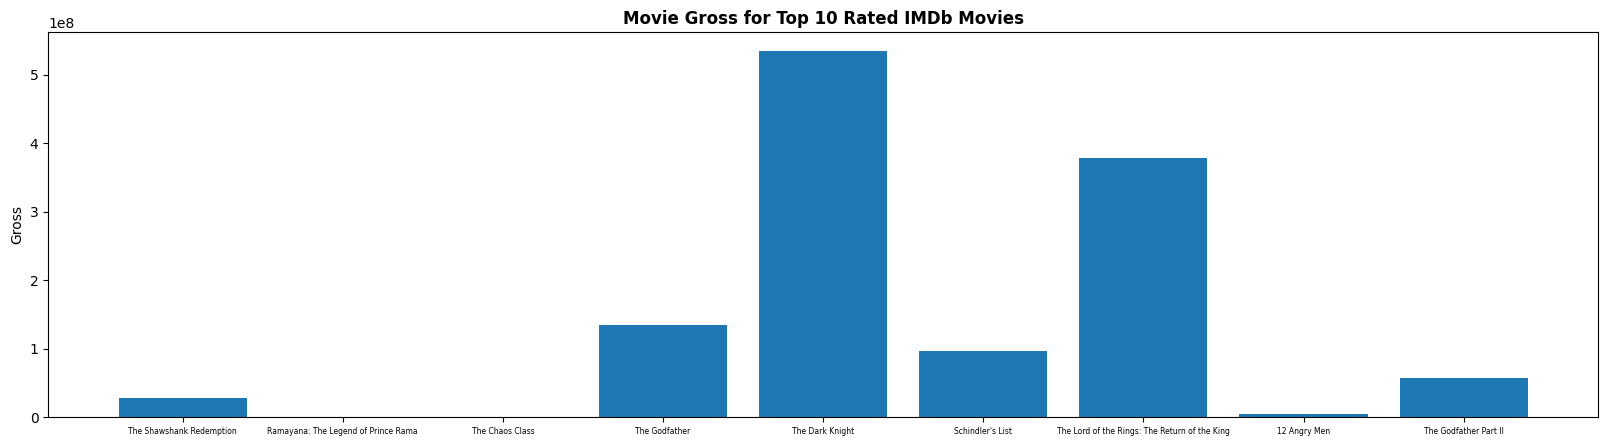

In [156]:
# gross of highest rated movies
top_rated = movies_df.sort_values('Movie Rating', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_rated['Movie Name'][:10], height=top_rated['Gross'][:10])
plt.xticks(size=5.5)
plt.title('Movie Gross for Top 10 Rated IMDb Movies', fontweight='bold')
plt.ylabel('Gross')

plt.show()

The top rated movies in the dataset do not necessarily have the highest grosses. 

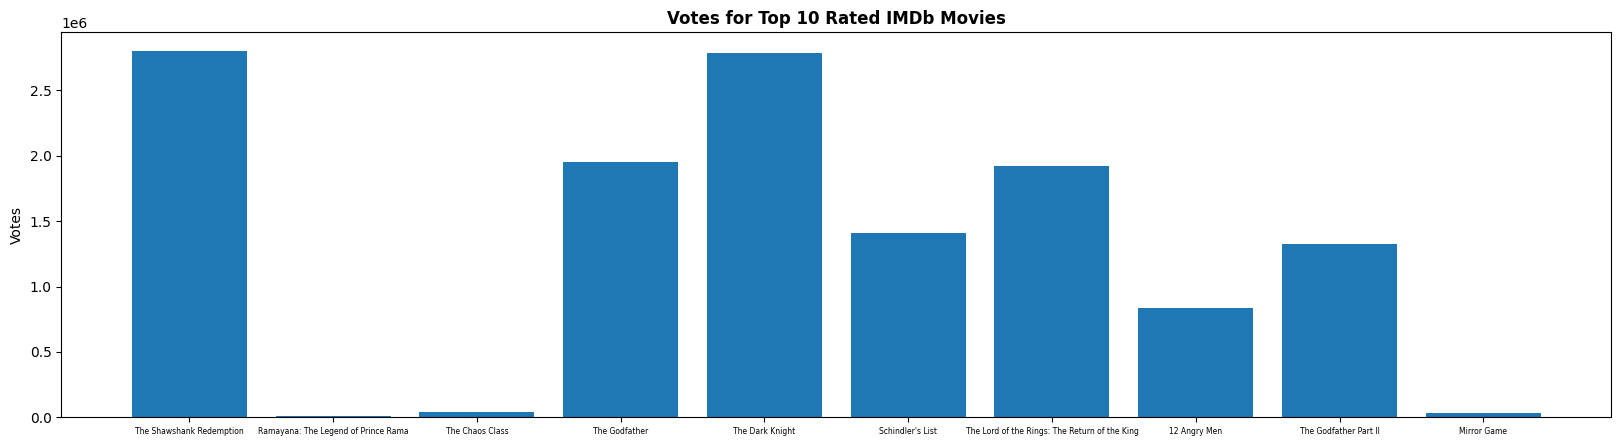

In [157]:
# vote count for highest rated movies
top_rated = movies_df.sort_values('Movie Rating', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_rated['Movie Name'][:10], height=top_rated['Votes'][:10])
plt.xticks(size=5.5)
plt.title('Votes for Top 10 Rated IMDb Movies', fontweight='bold')
plt.ylabel('Votes')

plt.show()

Some of the top rated movies have less than half the amount of votes of others. This may lead to an unfair advantage for these movies which allow them to appear in the "Top Rated" category. 

We will need to come up with a metric for an average rating based on the IMDb rating and the number of votes for that movie. 

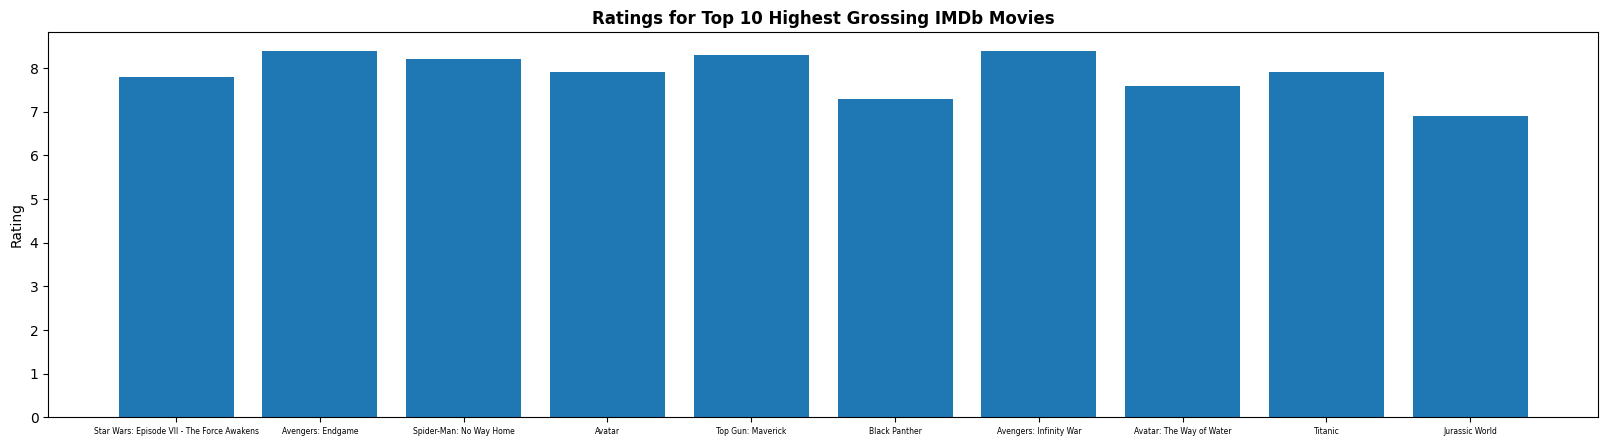

In [158]:
# ratings of highest grossing movies
top_gross = movies_df.sort_values('Gross', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_gross['Movie Name'][:10], height=top_gross['Movie Rating'][:10])
plt.xticks(size=5.5)
plt.title('Ratings for Top 10 Highest Grossing IMDb Movies', fontweight='bold')
plt.ylabel('Rating')

plt.show()

The ratings for the highest grossing movies are all quite high and all well above the average rating of 6.7.

### Data Wrangling

First, let's clean up some of the columns in the dataset. Specifically, the `Genre`, `Stars`, `Director`, and `Description` columns are all in the form of lists, but do not perform as such. We will turn the entries of these columns into lists for easier manipulation later on. Let's also rename the `Run Time in minutes` column.

In [159]:
# turn genre column into list
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: x.strip('(\[|\]|\s*)').upper().replace(' ', '').replace("'", '').split(','))

# function to turn column into list
def convert_to_list(str_list):
    cleaned = re.sub("'", '', str_list)
    return cleaned.strip('(\[|\]|)').split(',')    # remove brackets and split on comma

# turn rest of list-like columns into lists
movies_df['Director'] = movies_df['Director'].apply(convert_to_list)
movies_df['Stars'] = movies_df['Stars'].apply(convert_to_list)
movies_df['Description'] = movies_df['Description'].apply(convert_to_list)

# rename Run Time in minutes
movies_df.rename({'Run Time in minutes': 'Runtime Mins'}, axis=1, inplace=True)

movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...","[Over, the, course, of, several, years, ,..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...","[Don, Vito, Corleone, , head, of, a, maf..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...","[An, anime, adaptation, of, the, Hindu, ..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...","[Lazy, , uneducated, students, share, a, ..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...","[When, the, menace, known, as, the, Joke..."


In [160]:
# join description into string and remove all special characters
movies_df['Description'] = movies_df['Description'].apply(lambda x: ' '.join(x).lower())
movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...


Since there are some movies with the same titles (movies with a sequel of the same name or with a remake in another year), let's add the release year into the title for each movie.

In [161]:
# combine movie title and year into one column
movies_df['Movie Name'] = movies_df['Movie Name'] + ' (' + movies_df['Year of Release'].astype(str) +')'
movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...
2,Ramayana: The Legend of Prince Rama (1993),1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...
3,The Chaos Class (1975),1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...


For any certification that is null, let's fill with "Not Rated."

In [162]:
movies_df['Certification'].fillna('Not Rated', inplace=True)

Let's drop any other rows with missing values. 

In [163]:
movies_df.dropna(inplace=True)

movies_df.shape

(6480, 12)

There are now 6,480 rows in the dataset remaining. 

In [164]:
movies_df.isnull().sum().sum()

0

There are no more null values in the dataset.

For each movie, let's extract the main genre (the first appearing), the number of directors, the main director, the number of stars, and the main stars.

In [165]:
movies_df['Main Genre'] = movies_df['Genre'].apply(lambda x: x[0])  # extract first genre as main genre
movies_df['Num Directors'] = movies_df['Director'].apply(lambda x: len(x))   # the number of directors
movies_df['Main Director'] = movies_df['Director'].apply(lambda x: x[0])  # extract first director
movies_df['Num Stars'] = movies_df['Stars'].apply(lambda x: len(x))   # the number of stars
movies_df['Star One'] = movies_df['Stars'].apply(lambda x: x[0])   # main star 1
movies_df['Star Two'] = movies_df['Stars'].apply(lambda x: x[1] if len(x) > 1 else 'Unknown')   # main star 2
movies_df['Star Three'] = movies_df['Stars'].apply(lambda x: x[2] if len(x) > 2 else 'Unknown')   # main star 2

In [166]:
movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,Main Genre,Num Directors,Main Director,Num Stars,Star One,Star Two,Star Three
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...,DRAMA,1,Frank Darabont,4,Tim Robbins,Morgan Freeman,Bob Gunton
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...,CRIME,1,Francis Ford Coppola,4,Marlon Brando,Al Pacino,James Caan
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...,ACTION,1,Christopher Nolan,4,Christian Bale,Heath Ledger,Aaron Eckhart
5,Schindler's List (1993),1993,195,9.0,1409869,95.0,96900000.0,"[BIOGRAPHY, DRAMA, HISTORY]",R,[Steven Spielberg],"[Liam Neeson, Ralph Fiennes, Ben Kingsley, ...",in german-occupied poland during world wa...,BIOGRAPHY,1,Steven Spielberg,4,Liam Neeson,Ralph Fiennes,Ben Kingsley
6,The Lord of the Rings: The Return of the King ...,2003,201,9.0,1919908,94.0,377850000.0,"[ACTION, ADVENTURE, DRAMA]",PG-13,[Peter Jackson],"[Elijah Wood, Viggo Mortensen, Ian McKellen,...",gandalf and aragorn lead the world of m...,ACTION,1,Peter Jackson,4,Elijah Wood,Viggo Mortensen,Ian McKellen


### Analysis

Let's examine the correlation between different numerical features and the movie rating. 

In [168]:
numeric_features = movies_df[['Year of Release', 'Runtime Mins', 'Votes', 'MetaScore', 'Gross', 'Num Directors', 'Num Stars', 'Movie Rating']]
numeric_features.head()

,Year of Release,Runtime Mins,Votes,MetaScore,Gross,Num Directors,Num Stars,Movie Rating
0,1994,142,2804443,82.0,28340000.0,1,4,9.3
1,1972,175,1954174,100.0,134970000.0,1,4,9.2
4,2008,152,2786129,84.0,534860000.0,1,4,9.0
5,1993,195,1409869,95.0,96900000.0,1,4,9.0
6,2003,201,1919908,94.0,377850000.0,1,4,9.0


<Axes: >

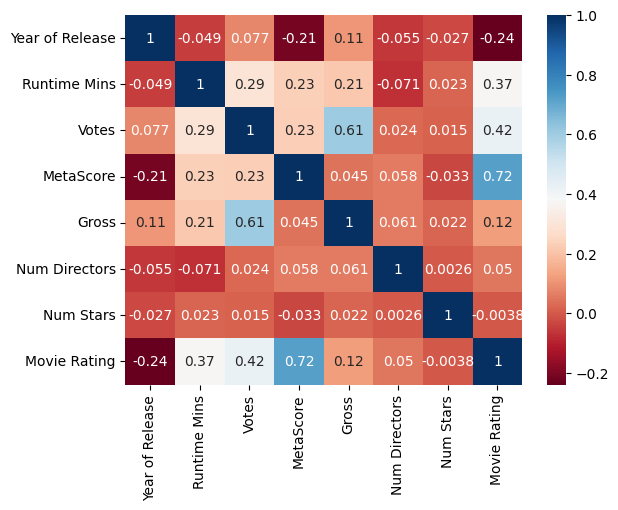

In [169]:
corr = numeric_features.corr()

sns.heatmap(corr, annot=True, cmap='RdBu')

- There is a large positive correlation between `MetaScore` and `Movie Rating` and between `Votes` and `Gross`. 
- There is a slight positive correlation between `Runtime Mins` and `Movie Rating', 'Votes` and `Movie Rating`, and `Runtime Mins` and `Gross`.
- There is a very small positive correlation between `Gross` and `Movie Rating`. 
- There is a slight negative correlation between `Year of Release` and `Movie Rating` and `Year of Release` and `MetaScore`.

In [ ]:
features_df = movies_df[['Year of Release', 'Run Time in minutes', 'Votes', 'MetaScore', 'Gross', 'Main Genre', 'Certification', 'Num Directors', 'Main Director', 'Num Stars', 'Star One', 'Star Two', 'Star Three', 'Movie Rating']]
features_df.head()

,Year of Release,Run Time in minutes,Votes,MetaScore,Gross,Main Genre,Certification,Num Directors,Main Director,Num Stars,Star One,Star Two,Star Three,Movie Rating
0,1994,142,2804443,82.0,28340000.0,DRAMA,R,1,Frank Darabont,4,Tim Robbins,Morgan Freeman,Bob Gunton,9.3
1,1972,175,1954174,100.0,134970000.0,CRIME,R,1,Francis Ford Coppola,4,Marlon Brando,Al Pacino,James Caan,9.2
4,2008,152,2786129,84.0,534860000.0,ACTION,PG-13,1,Christopher Nolan,4,Christian Bale,Heath Ledger,Aaron Eckhart,9.0
5,1993,195,1409869,95.0,96900000.0,BIOGRAPHY,R,1,Steven Spielberg,4,Liam Neeson,Ralph Fiennes,Ben Kingsley,9.0
6,2003,201,1919908,94.0,377850000.0,ACTION,PG-13,1,Peter Jackson,4,Elijah Wood,Viggo Mortensen,Ian McKellen,9.0


In order to get the correlation with categorical variables, these need to be recoded as dummy variables. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

genre_labels = ['DRAMA', 'CRIME', 'ACTION', 'BIOGRAPHY', 'ADVENTURE', 'ANIMATION', 'COMEDY', 'HORROR', 'MYSTERY', 'WESTERN', 'FILM-NOIR', 'FAMILY', 'THRILLER', 'FANTASY', 'SCI-FI', 'MUSICAL', 'ROMANCE', 'MUSIC']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(genre_labels)

# Display the encoded labels
print(encoded_labels)
# Output: array([0, 1, 2, 1])

# Inverse transform to get back the original labels
original_labels = label_encoder.inverse_transform(encoded_labels)
print(original_labels)
# Output: array(['cat', 'dog', 'bird', 'dog'], dtype='<U4')

[ 6  5  0  3  1  2  4 10 13 17  9  7 16  8 15 12 14 11]
['DRAMA' 'CRIME' 'ACTION' 'BIOGRAPHY' 'ADVENTURE' 'ANIMATION' 'COMEDY'
 'HORROR' 'MYSTERY' 'WESTERN' 'FILM-NOIR' 'FAMILY' 'THRILLER' 'FANTASY'
 'SCI-FI' 'MUSICAL' 'ROMANCE' 'MUSIC']


In [ ]:
movies_df['Main Genre'].unique()

array(['DRAMA', 'CRIME', 'ACTION', 'BIOGRAPHY', 'ADVENTURE', 'ANIMATION',
       'COMEDY', 'HORROR', 'MYSTERY', 'WESTERN', 'FILM-NOIR', 'FAMILY',
       'THRILLER', 'FANTASY', 'SCI-FI', 'MUSICAL', 'ROMANCE', 'MUSIC'],
      dtype=object)


**Which genres are most popular?**

The dataset is comprised of the top 10,000 movies on IMDb. In order to determine the most popular genres, let's see which genres appear the most within the dataset.

In [ ]:
movies_df.explode('Genre', ',')['Genre'].value_counts().reset_index()

,Genre,count
0,DRAMA,3690
1,COMEDY,2465
2,ACTION,1599
3,CRIME,1299
4,ADVENTURE,1240
5,ROMANCE,1166
6,THRILLER,1030
7,HORROR,671
8,MYSTERY,641
9,FANTASY,506


The top 5 genres which appear the most in the dataset are drama, comedy, action, crime, and romance. 

### Basic Recommender

IMDb ratings are weighted based on user authenticity. They have another rating system which they use to determine top movies, specifically implemented in their "Top 250" page.

The formula is as follows: 

$ WR = \frac{v}{v+m} * R + \frac{m}{v+m} * C $

where: 

- R = average rating for movie
- v = number of votes for movie
- m = minimum votes to be listed in Top 250 (25,000 votes)
- C = mean vote across dataset

Let's come up with a function to calculate the weighted rating for each movie. 

In [ ]:
def weighted_rating(df, m=25000):
    R = df['Movie Rating']
    v = df['Votes']
    C = df['Movie Rating'].mean()

    return (v/(v+m) * R) + (m/(v+m) * C)

Now let's apply this to create a weighted rating column. 

In [ ]:
movies_df['Weighted Rating'] = round(weighted_rating(movies_df), 1)
movies_df.head()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,Main Genre,Num Directors,Main Director,Num Stars,Star One,Star Two,Star Three,Weighted Rating
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...,DRAMA,1,Frank Darabont,4,Tim Robbins,Morgan Freeman,Bob Gunton,9.3
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...,CRIME,1,Francis Ford Coppola,4,Marlon Brando,Al Pacino,James Caan,9.2
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...,ACTION,1,Christopher Nolan,4,Christian Bale,Heath Ledger,Aaron Eckhart,9.0
5,Schindler's List (1993),1993,195,9.0,1409869,95.0,96900000.0,"[BIOGRAPHY, DRAMA, HISTORY]",R,[Steven Spielberg],"[Liam Neeson, Ralph Fiennes, Ben Kingsley, ...",in german-occupied poland during world wa...,BIOGRAPHY,1,Steven Spielberg,4,Liam Neeson,Ralph Fiennes,Ben Kingsley,9.0
6,The Lord of the Rings: The Return of the King ...,2003,201,9.0,1919908,94.0,377850000.0,"[ACTION, ADVENTURE, DRAMA]",PG-13,[Peter Jackson],"[Elijah Wood, Viggo Mortensen, Ian McKellen,...",gandalf and aragorn lead the world of m...,ACTION,1,Peter Jackson,4,Elijah Wood,Viggo Mortensen,Ian McKellen,9.0


Now let's print the top movies for each genre. Since there are a lot of genres, let's print out the top 5 movies for the top 5 most occuring genres.

First, let's see the most occuring genres.

In [ ]:
# count the number of movies categorized in each genre
movies_df.explode('Genre', ',')['Genre'].value_counts().reset_index()[:5]   # top 5

,Genre,count
0,DRAMA,3690
1,COMEDY,2465
2,ACTION,1599
3,CRIME,1299
4,ADVENTURE,1240


The top 5 most occuring genres are drama, comedy, action, crime, and adventure. 

In [ ]:
movies_df['Genre'][0]

['DRAMA']

### Content Based Recommender

Let's first create a content-based recommender using the description. In order to do this, we must first vectorize the description. 

In [ ]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# make TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies_df['Description'])

# output shape
tfidf_matrix.shape

(6480, 15772)

We will use cosine simlarity scores to compare the similarities between descriptions. 

In [ ]:
# import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['Movie Name']).drop_duplicates()

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['Movie Name'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight (2008)')

20      The Lord of the Rings: The Two Towers (2002)
9178                    Beverly Hills Cop III (1994)
704                X-Men: Days of Future Past (2014)
910       The Hobbit: The Desolation of Smaug (2013)
5870                    Under the Silver Lake (2018)
1149                          The Dirty Dozen (1967)
4194                      Conan the Barbarian (1982)
6797                                Rock Star (2001)
4894                                 Red Road (2006)
6676                           Under the Skin (2013)
Name: Movie Name, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### Additional Resources:

- IMDb weighted rating: https://www.quora.com/How-does-IMDbs-rating-system-work
- https://www.datacamp.com/tutorial/recommender-systems-python